In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import textwrap



NETWORKX GRAPH


In [ ]:
def read_data(file_path):
    """
    Reads data from a CSV file and returns a DataFrame.
    """
    df = pd.read_csv(file_path)
    return df.loc[:, ['Module Code', 'Module Name', 'Pre-requisites', 'Module Level']]

def create_graph(df):
    """
    Creates a directed graph using the module codes and prerequisites specified in the DataFrame.
    Returns the graph.
    """
    G = nx.DiGraph()
    module_codes = df['Module Code'].tolist()
    module_names = df['Module Name'].tolist()

    for i, module_code in enumerate(module_codes):
        name = module_names[i]
        G.add_node(module_code, name=name)

    for index, row in df.iterrows():
        module_code = row['Module Code']
        prerequisites = row['Pre-requisites']
        if prerequisites != 'NIL':
            prerequisites_list = prerequisites.split(", ")
            for prereq in prerequisites_list:
                if prereq not in G.nodes():
                    G.add_node(prereq, name="")
                G.add_edge(prereq, module_code)

    return G

def draw_graph(G):
    """
    Draws the directed graph using networkx and matplotlib.
    """
    pos = nx.shell_layout(G, scale=7)

    # Define colors based on module level
    color_map = {1: 'lightblue', 2: 'lightgreen', 3: 'violet', 4: 'pink'}

    # Assign node colors based on module level
    node_colors = []
    for n in G.nodes():
        if n in df['Module Code'].values:
            node_level = df.loc[df['Module Code']==n, 'Module Level'].values[0]
            color = color_map.get(node_level, 'gray')
            node_colors.append(color)
        else:
            node_colors.append('gray')

    # Draw the graph
    fig, ax = plt.subplots(figsize=(12,10))
    nx.draw_networkx_nodes(G, pos, node_size=1200, node_color=node_colors)
    for code, name in nx.get_node_attributes(G, 'name').items():
        if len(name.split()) > 2:
            name_lines = textwrap.wrap(name, width=25)
            name = '\n'.join(name_lines)
        nx.draw_networkx_labels(G, {code: pos[code]+ [0, +0.1]}, labels={code: f"{code}"}, font_weight='bold', font_size=8)
        nx.draw_networkx_labels(G, {code: pos[code] + [0, -0.2]}, labels={code: f"{name}"}, font_weight='normal', font_size=5)

    edges = nx.draw_networkx_edges(G, pos, width=2, arrowsize=9, edge_color="gray", connectionstyle='arc3, rad = 0.1')
    for edge in edges:
        edge.set_zorder(10)

    xmin, xmax, ymin, ymax = plt.axis()
    plt.axis([xmin-0.1, xmax+0.1, ymin-0.1, ymax+0.1])

    plt.show()



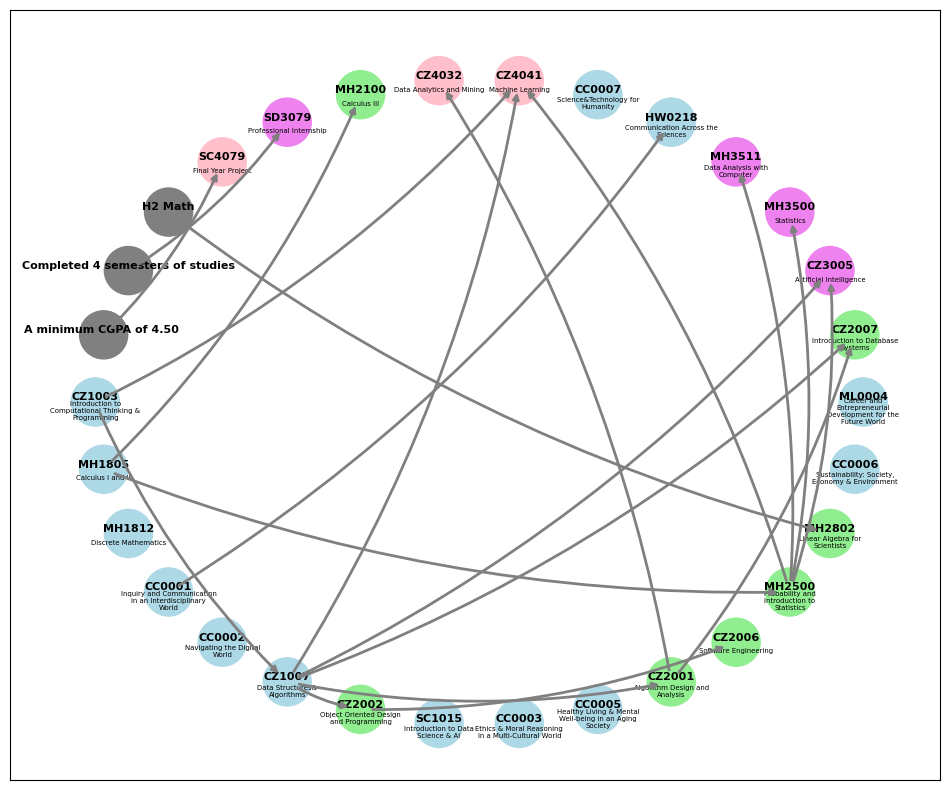

In [7]:

# Call the load_data function to load the data into a pandas DataFrame
df = read_data("/Users/micolechan/Desktop/dsa3101/dsa3101-2220-12-ds/Data/university_courses/NTU_course_info.csv")

# Call the create_graph function to create a networkx graph
G = create_graph(df)

# Call the draw_graph function to draw the graph using matplotlib
draw_graph(G)

GEPHI GRAPH FORMATTING

In [4]:
def transform_to_gephi_format(df):
    # Create nodes sheet
    nodes = df[['Module Code', 'Module Name', 'Module Level']].copy()
    nodes.columns = ['Id', 'Name', 'Level']
    nodes.insert(1, 'Label', nodes['Name'])
    nodes = nodes.drop('Name', axis=1)

    # Create edges sheet
    edges = pd.DataFrame(columns=['Source', 'Target', 'Type', 'Weight'])
    for index, row in df.iterrows():
        module_code = row['Module Code']
        prerequisites = row['Pre-requisites']
        if prerequisites != 'NIL':
            prerequisites_list = prerequisites.split(", ")
            for prereq in prerequisites_list:
                edges = pd.concat([edges, pd.DataFrame({'Source': prereq, 'Target': module_code, 'Type': 'Directed', 'Weight': 1}, index=[0])], ignore_index=True)

    return nodes, edges

# Call the load_data function to load the data into a pandas DataFrame
df = pd.read_csv("/Users/micolechan/Desktop/dsa3101/dsa3101-2220-12-ds/Data/university_courses/NTU_course_info.csv", usecols=['Module Code', 'Module Name', 'Pre-requisites', 'Module Level'])

# Transform the data to Gephi format
nodes, edges = transform_to_gephi_format(df)

# Export nodes and edges to CSV files
nodes.to_csv('/Users/micolechan/Desktop/dsa3101/dsa3101-2220-12-ds/Backend/Code/nodes.csv', index=False)
edges.to_csv('/Users/micolechan/Desktop/dsa3101/dsa3101-2220-12-ds/Backend/Code/edges.csv', index=False)
